<a href="https://colab.research.google.com/github/juangross/cAM/blob/main/tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TP1)La actividad consiste en:

* Métodos para abrir una imagen de un archivo y disponer la información en una componente imagen. (tamaño, canales, formato, etc)
* Métodos para guardar la información de una componente imagen a un archivo.
* Métodos para acceder a una componente imagen y leer o modificar su contenido.
* Métodos para graficar o modificar una componente imagen.



**Observaciones**: se busca que desarrollen un código que permita abrir una imagen, conocer las características de esta, luego modificarla mediante alguna alteración en los canales RGB, graficarla y luego guardar el resultado como una imagen nueva. 

In [1]:
!git clone https://github.com/juangross/cAM

Cloning into 'cAM'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 13 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


* Métodos para abrir una imagen de un archivo y disponer la información en una componente imagen. (tamaño, canales, formato, etc)

leyendo archivo: ./cAM/imagenes/patron_RGBCMYWK.png
imagen de entrada


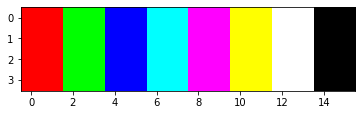

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio as img


# Import an image from directory:
path="./cAM/imagenes/"
archi="patron_RGBCMYWK"
archo="output"
archo2="output2"
ext="png"

#formato actual

print("leyendo archivo:", f"{path}{archi}.{ext}")
#input_image= mpimg.imread(f"{archi}.{ext}")  #lee con matplotlib
input_image=img.imread(f"{path}{archi}.{ext}")      #lee con imageio

#formatos mas antiguos pero compatibles hacia atrás
#input_image= mpimg.imread("{}.{}".format(archi,ext))
#input_image= mpimg.imread("{}.{}" % (archi,ext))     #este no anduvo, revisar
print ("imagen de entrada")
plt.imshow(input_image)



In [17]:
input_tam=input_image.shape

print("Dimensiones (X,Y,canales): ", input_tam)
print("tipo de datos: " , input_image.dtype)

print("Datos en crudo: ")
input_image[:,:,:]


Dimensiones (X,Y,canales):  (4, 16, 3)
tipo de datos:  uint8
Datos en crudo: 


Array([[[255,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0, 255, 255],
        [  0, 255, 255],
        [255,   0, 255],
        [255,   0, 255],
        [255, 255,   0],
        [255, 255,   0],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0, 255, 255],
        [  0, 255, 255],
        [255,   0, 255],
        [255,   0, 255],
        [255, 255,   0],
        [255, 255,   0],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0, 255, 255],
        [  0, 255, 25

* Métodos para guardar la información de una componente imagen a un archivo.

Seleccione un canal [0 - 2]


IntSlider(value=0, max=2)

Button(description='Generar salida', style=ButtonStyle())

Output()

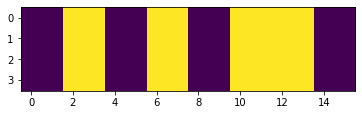

In [18]:
# permite elegir un canal de input_image y generar un archivo sólo de ese canal, luego lo lee y muestra en pantalla
import ipywidgets as widgets
sCanal = widgets.IntSlider(value=0, max=2)
print("Seleccione un canal [0 - 2]")
display(sCanal)

button = widgets.Button(description="Generar salida")
output = widgets.Output()

def on_button_clicked(b):
  
  with output:
    print("escribiendo archivo:", f"{path}{archo}.{ext}")
    print("Generando imagen del canal ", sCanal.value)
    output_image=img.imwrite(f"{path}{archo}.{ext}", input_image[:,:,sCanal.value])

    print("leyendo archivo:", f"{path}{archo}.{ext}")
    output_image=img.imread(f"{path}{archo}.{ext}")      #lee con imageio
    print ("imagen de salida:")
    plt.imshow(output_image)

button.on_click(on_button_clicked)
display(button, output)



* Métodos para acceder a una componente imagen y leer o modificar su contenido
* Métodos para graficar o modificar una componente imagen

Seleccione un canal [0 - 2]


IntSlider(value=0, max=2)

Seleccione un valor:


IntSlider(value=128, max=255)

Button(description='Generar salida', style=ButtonStyle())

Output()

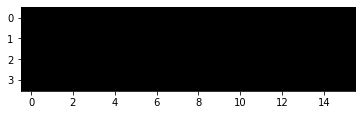

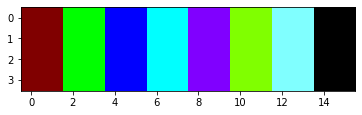

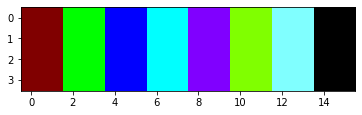

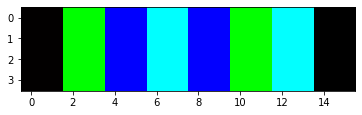

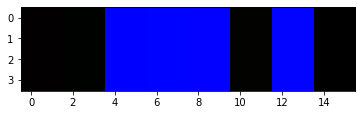

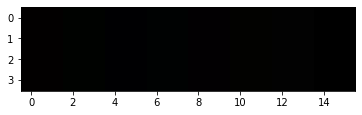

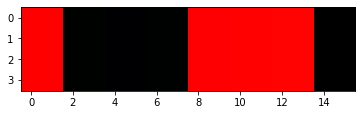

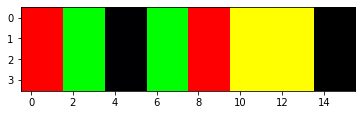

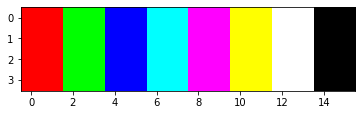

In [14]:
#Funcionamiento deseado
#El usuario elije un canal y un valor, la rutina
# debe alterar el valor de cada pixel de ese canal y pisarlo con el valor seleccionado

#observaciones JP
#no me queda claro como python ordena las coordenadas de las matrices
#estoy acostumbrado a [fila,columna,dimensión 3, dimensión 4, etc]
#pero parece que python lo hace de manera diferente

import ipywidgets as widgets
sCanal2 = widgets.IntSlider(value=0, max=2)
print("Seleccione un canal [0 - 2]")
display(sCanal2)

sValor = widgets.IntSlider(value=128, max=255)
print("Seleccione un valor:" )
display(sValor)


button2 = widgets.Button(description="Generar salida")
output = widgets.Output()


def on_button2_clicked(b):
  tmp_image=input_image
  #tmp_image[0,:,sCanal2.value]=  sValor.value
  
  for j in range(input_tam[1]):
    for i in range(input_tam[0]):
  
      #si el valor del pixel es >0 lo piso con el valor nuevo
      if(tmp_image[i,j,sCanal2.value]):
        tmp_image[i,j,sCanal2.value]=sValor.value
  
  with output:
    #print ("imagen alterada:")
    #tmp_image[:,:,:]
    output_image2=img.imwrite(f"{path}{archo2}.{ext}", tmp_image[:,:,:])
    #print("leyendo archivo:", f"{path}{archo2}.{ext}")
    output_image2=img.imread(f"{path}{archo2}.{ext}")      #lee con imageio
    print ("imagen de salida:")
    plt.imshow(output_image2)


button2.on_click(on_button2_clicked)
display(button2, output)


